In [ ]:
import cv2
import torch
import pandas as pd 
import torch.nn as nn
import matplotlib.pyplot as plt
from torch.autograd import Variable
from torch.utils.data import random_split
# from torch.utils.data import DataLoader, dataset
from torchvision import datasets, transforms

#######################################################
#               Define Dataset Class                  #
#######################################################
import os
from PIL import Image
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms

class CustomDataset(Dataset):
    def __init__(self, root_dir):
        self.root_dir = root_dir
        self.classes = os.listdir(root_dir)
        self.class_to_idx = {cls_name: i for i, cls_name in enumerate(self.classes)}
        self.images = []
        for cls_name in self.classes:
            cls_dir = os.path.join(root_dir, cls_name)
            for img_name in os.listdir(cls_dir):
                img_path = os.path.join(cls_dir, img_name)
                self.images.append((img_path, self.class_to_idx[cls_name]))

        self.transforms = transforms.Compose([
            transforms.Resize((224, 224)),
            transforms.ToTensor(),
        ])

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        img_path, class_idx = self.images[idx]
        with open(img_path, 'rb') as f:
            image = Image.open(f).convert('RGB')
        tensor_image = self.transforms(image)
        return tensor_image, class_idx, img_path


# Example usage

path="A:/Algorithm_Trading_01/DATA/Train/"
dataset = CustomDataset(path)
########################################################
#               Define DataLoader Class                #
########################################################

train_size=int(0.8*len(dataset))
test_size=int(0.2*len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = torch.utils.data.random_split(dataset, [train_size, test_size])
train_loader = DataLoader(train_dataset, batch_size=5, shuffle=True)   
test_loader = DataLoader(train_dataset, batch_size=5, shuffle=True)   
len(train_dataset),len(test_dataset)


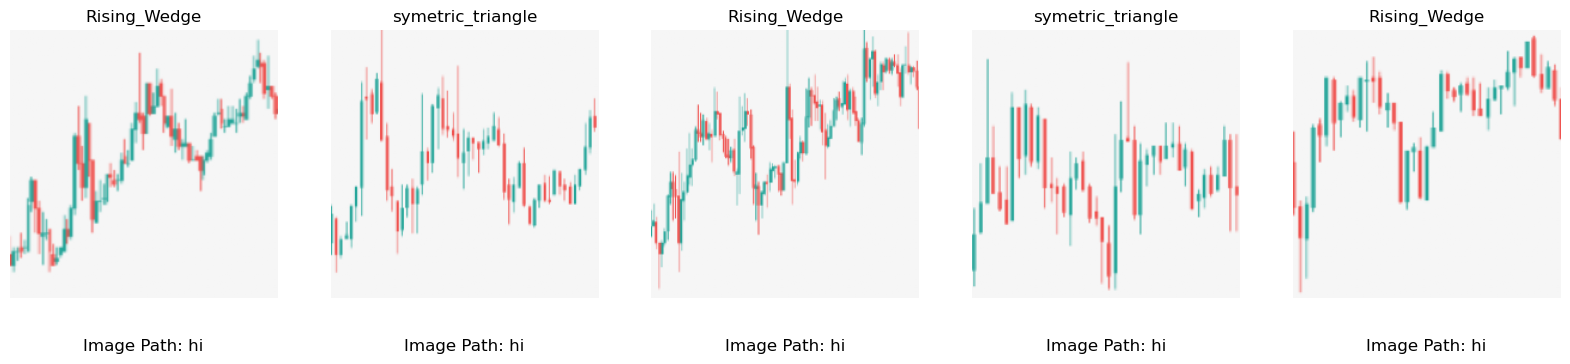

In [4]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(figsize=(20,10), ncols=5)
for ii in range(5):
    images, class_labels, paths = next(iter(train_loader))
    ax = axes[ii] # Define the every axis
    ax.imshow(images[0].permute(1,2,0)) # plot every chart in 4 axis. 
    # add title
    if class_labels[0] == 1:    
        ax.set_title("symetric_triangle")
    else: 
        ax.set_title("Rising_Wedge")
    ax.axis('off')
    ax.grid(b=None)
    # add text label
    ax.text(0.5, -0.2, f"Image Path: {'hi'}", ha="center", transform=ax.transAxes, fontsize=12)


In [20]:
for x in next(iter(train_loader)):
    
    # x,y,z=next(iter(train_loader))


torch.Size([32, 3, 224, 224])
torch.Size([32])


AttributeError: 'tuple' object has no attribute 'shape'

In [66]:
from torch import nn
from torch.functional import F
# Function to save the model
# def saveModel():
#     path = "../myF
# irstModel.pth"
#     torch.save(net.state_dict(), path)
#      # in the jupyter ./ and / is the same directory that our folder is and ../ is a step back from the original directory
# saveModel()

"""
 # where are we excatly
# cwd = os.getcwd()
# print("Current working directory:", cwd)

"""


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1)
        self.conv3 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(64 * 28 * 28, 128)
        self.fc2 = nn.Linear(128, 2)

    def forward(self, x):
        x = self.pool(self.conv1(x))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(self.conv3(x))
        x = x.view(-1, 64 * 28 * 28)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x


# Instantiate a neural network model 
model = Net()


# # Function to test the model with the test dataset and print the accuracy for the test images
# def testAccuracy():
    
#     Net.eval()
#     accuracy = 0.0
#     total = 0.0
    
#     with torch.no_grad():
#         for data in val_loader:
#             images, labels = data
#             # run the model on the test set to predict labels
#             outputs = Net(images)
#             # the label with the highest energy will be our prediction
#             _, predicted = torch.max(outputs.data, 1)
#             total += labels.size(0)
#             accuracy += (predicted == labels).sum().item()
    
#     # compute the accuracy over all test images
#     accuracy = (100 * accuracy / total)
#     return(accuracy)



loss_saver=[]
optimizer=torch.optim.Adam(model.parameters(), lr=0.001)
loss_fn=torch.nn.CrossEntropyLoss()
def train(num_epochs):
    z=0
    best_accuracy = 0.0
    # Define your execution device
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    print("The model will be running on", device, "device")
    # Convert model parameters and buffers to CPU or Cuda
    # Net.to(device)

    for epoch in range(num_epochs):  # loop over the dataset multiple times
        running_loss = 0.0
        running_acc = 0.0

        for i, (images, labels,path) in enumerate(train_loader):
            
        
            # images = Variable(images.to(device))
            # labels = Variable(labels.to(device))
            # Makes predictions
            yhat = model(images)
            # # print(yhat)
            # loss_count=[]
            # for ind,(xlab,ylab) in enumerate(zip(yhat,labels)):
        
            #     loss = loss_fn(yhat,labels)
            #     loss_count.append(loss)
                   

            # real_loss=sum(loss_count)/len(loss_count)

            # Computes loss
            # torch.argmax(yhat,dim=0
            
            # print(loss,labels)
            
            
            loss = loss_fn(yhat,labels)
        
            # Computes gradients
            loss.backward()
            
#             # Updates parameters and zeroes gradients
            optimizer.step()
            optimizer.zero_grad()

            loss_saver.append(loss.item())

            print(loss)
            
train(5)


The model will be running on cpu device
tensor(0.7389, grad_fn=<NllLossBackward0>)
tensor(4.0775, grad_fn=<NllLossBackward0>)
tensor(1.9201, grad_fn=<NllLossBackward0>)
tensor(0.6850, grad_fn=<NllLossBackward0>)
tensor(0.8862, grad_fn=<NllLossBackward0>)
tensor(4.3977, grad_fn=<NllLossBackward0>)
tensor(0.5087, grad_fn=<NllLossBackward0>)
tensor(1.5816, grad_fn=<NllLossBackward0>)
tensor(0.9431, grad_fn=<NllLossBackward0>)
tensor(1.5128, grad_fn=<NllLossBackward0>)
tensor(2.1131, grad_fn=<NllLossBackward0>)
tensor(1.2321, grad_fn=<NllLossBackward0>)
tensor(0.9310, grad_fn=<NllLossBackward0>)
tensor(0.6666, grad_fn=<NllLossBackward0>)
tensor(0.8516, grad_fn=<NllLossBackward0>)
tensor(0.0808, grad_fn=<NllLossBackward0>)
tensor(1.2651, grad_fn=<NllLossBackward0>)
tensor(0.0352, grad_fn=<NllLossBackward0>)
tensor(0.7142, grad_fn=<NllLossBackward0>)
tensor(2.0695, grad_fn=<NllLossBackward0>)
tensor(1.7583, grad_fn=<NllLossBackward0>)
tensor(0.5210, grad_fn=<NllLossBackward0>)
tensor(0.7360,

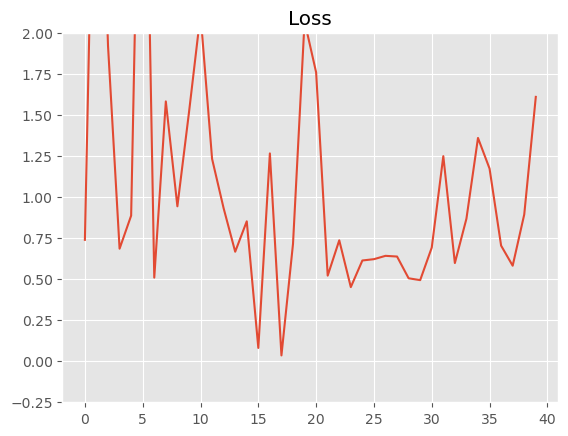

In [67]:
plt.style.use('ggplot')
plt.plot(loss_saver)
plt.ylim(-0.25,2)
plt.title('Loss')
plt.savefig('C:/Users/Erfan/Desktop/loss_saver.png')



Epoch 1/100, Train Loss: 1.1380 Train Accuracy: 33.33% ,Test Accuracy: 0.37%
Epoch 11/100, Train Loss: 0.7023 Train Accuracy: 67.50% ,Test Accuracy: 0.63%
Epoch 21/100, Train Loss: 0.4682 Train Accuracy: 67.50% ,Test Accuracy: 0.63%
Epoch 31/100, Train Loss: 0.4655 Train Accuracy: 67.50% ,Test Accuracy: 0.63%
Epoch 41/100, Train Loss: 0.4632 Train Accuracy: 65.83% ,Test Accuracy: 0.70%
Epoch 51/100, Train Loss: 0.4623 Train Accuracy: 67.50% ,Test Accuracy: 0.63%
Epoch 61/100, Train Loss: 0.4616 Train Accuracy: 67.50% ,Test Accuracy: 0.63%
Epoch 71/100, Train Loss: 0.3801 Train Accuracy: 75.00% ,Test Accuracy: 0.97%
Epoch 81/100, Train Loss: 0.1196 Train Accuracy: 96.67% ,Test Accuracy: 0.97%
Epoch 91/100, Train Loss: 0.1109 Train Accuracy: 95.83% ,Test Accuracy: 0.87%


Text(0.5, 0, 'epochs')

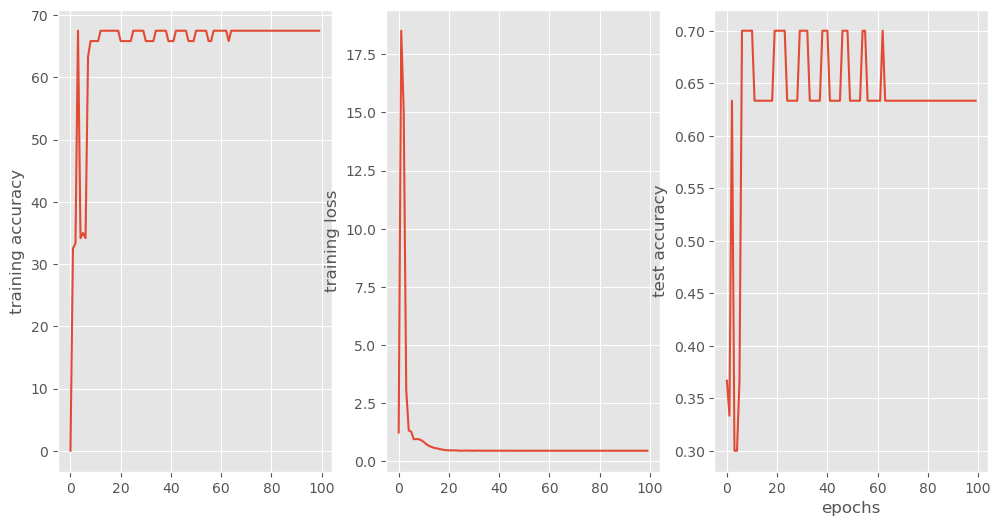

In [383]:
import matplotlib.pyplot as plt
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(12, 6), sharex=True)

ax1.plot(train_accuracy_saver)
ax1.set_ylabel("training accuracy")

ax2.plot(train_loss_saver)
ax2.set_ylabel("training loss")

ax3.plot(eval_accuracy_saver)
ax3.set_ylabel("test accuracy")

ax3.set_xlabel("epochs")

# train_accuracy_saver
# train_loss_saver

134

Trying ot deal with the My Dataset class:

a:\python_env1\env\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


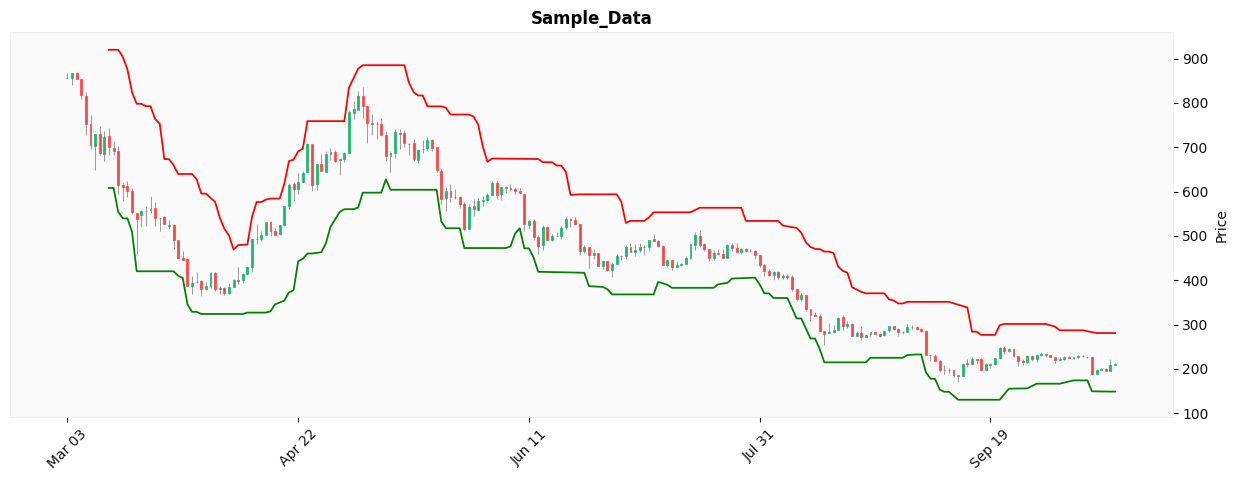

In [226]:
import pandas as pd
import numpy as np
import torch 
from torch import nn
from sklearn.model_selection import train_test_split as split
# Normalizaiton
# torch.nn.functional.normalize
from  sklearn.preprocessing import Normalizer
from sklearn.linear_model import LinearRegression as LR
# norm=Normalizer()
import mplfinance as mpl
import matplotlib.pyplot as plt



df=pd.read_csv('../ETH-D.csv',index_col=0,parse_dates=True)

strd_end = np.random.randint(100, 150)
strd_end = np.append(strd_end, np.random.randint(300, 350))

sample = df.iloc[strd_end.min():strd_end.max(), :]

# for ind in sample.High:
UPPER = sample['High'].rolling(window=10).max()
LOWER = sample['Low'].rolling(window=10).min()

colors = ['r', 'g']
higher=[]
lower=[]
for i,(value,ind) in enumerate(zip(sample.High,sample.index)):
    # print(value,ind)
    higher.append((ind,value+40))

for i,(value,ind) in enumerate(zip(sample.Low,sample.index)):
    # print(value,ind)
    lower.append((ind,value+-40))

# plot candlestick chart with allines


###################Add another plot to the mpl plot###################

fig = mpl.figure(figsize=(15,5), style='yahoo')
ax = fig.add_subplot(1,1,1)
    
sample = df.iloc[strd_end.min():strd_end.max(), :]

apds =[mpl.make_addplot(LOWER - 40,color='g',ax=ax,),
       mpl.make_addplot(UPPER + 50,color='r',ax=ax,marker='v')
       ]
font = {'family' : 'sans-serif',
        'weight' : 'bold',
        'size'   : 12}

mpl.plot(sample,addplot=apds, type='candle',ax=ax)

plt.title('Sample_Data',fontdict=font)
plt.grid(False)
plt.show()

#####################################################################    

In [23]:
from math import pi

import pandas as pd
import numpy as np
import os
from bokeh.plotting import figure, show, output_file
import bokeh

#Self Identified Triangle Pattern stocks
#AAPL, JNJ, CAT, NVDA
#------------------------------------------------
#-----------USER INPUT---------------------------
#------------------------------------------------
#Symbol to be called
symbol = 'ETH'

#The minimum that the line must extend
line_len_min = 2
line_dist = 2
#The maximum that a line can extend
day_diff = 17

#When matching up the lines, this is the difference in days that the
#lines are able to extend
match_diff_start = 2  
match_diff_end = 2  
#------------------------------------------------

#Calls the script to get a csv with stock data from x days ago,
#If you want to change the amount of days, have to edit under
#download_quotes() in get-yahoo-quotes
# os.system('python get-yahoo-quotes.py ' + symbol)


#Dataframe used for indices as follows
# np.random.seed(42)
# strd_start=np.random.randint(150,200)
# strd_end = np.random.randint(500,800)

df = pd.read_csv('../ETH-D.csv',index_col=0,parse_dates=True)
# df=btc_data
# df=btc_data.copy()
# df.index=pd.DatetimeIndex(df.index)
df=df.loc['2022-11-05':]
df['Date']=df.index




# df=df.iloc[strd_start:strd_end,:]
#Access the dataframe for reading
#print(df)

inc = df.Close > df.Open
dec = df.Open > df.Close
w = 12*60*60*1000 # half day in ms

TOOLS = "pan,wheel_zoom,box_zoom,reset,save"

p = figure(x_axis_type="datetime", tools=TOOLS, title = symbol+" Candlestick",height=400, width=1300,toolbar_location='below')
p.xaxis.major_label_orientation = pi/4
p.grid.grid_line_alpha=0.3
#actual candlestick creator
p.segment(df.Date, df.High, df.Date, df.Low, color="black")


# #Creates the candlesticks, for each bar there
p.vbar(df.Date[inc], w, df.Open[inc], df.Close[inc], fill_color="red", line_color="red")
p.vbar(df.Date[dec], w, df.Open[dec], df.Close[dec], fill_color="green", line_color="green")


#Create an numpy array for highs, lows, and dates from DataFrame
highs = np.array(df['High'])
lows = np.array(df['Low'])
dates = np.array(df['Date'])
days = highs.size

#Print the number of days of the data
print("Days in data:", days)

#Connects all of the highs together and lows together
#p.line(dates, highs)
#p.line(dates, lows)


#----------------Find the Swings-----------------------------
#Stores the day(index) at which a max/min is found
#Will create a dataframe of this later
max_prices = []
max_dates = []
max_days = []
min_prices = []
min_dates = []
min_days = []
#This for loop will find the peak of the highs
#This also signifies a swing pattern throughout the days
for x in range(1, days-1):
    if highs[x-1] < highs[x] > highs[x+1] or x == 1:
        #p.circle(dates[x],highs[x])
        max_prices.append(highs[x])
        max_dates.append(dates[x])
        max_days.append(x)

for y in range(1, days-1):
    if lows[y-1] > lows[y] < lows[y+1]:
        #p.circle(dates[y],lows[y])
        min_prices.append(lows[y])
        min_dates.append(dates[y])
        min_days.append(y)
#--------------------------------------------------------
#p.line([min_dates], [min_prices], color = "black")

#------------------Find Possible Lines-------------------
#find all the combinations from a positive to a negative slope and draw that line
#we only care about localized regions, so we can edit that with line_len_min/day_diff
max_days_size = len(max_prices)
start_day_max = []
start_date_max = []
start_price_max = []
end_day_max = []
end_date_max = []
end_price_max = []


#Find possible lines that are negatively sloping and fall within the range
for x in range(max_days_size-line_len_min):
    #graph every slope that creates a negative within our range
    start_day = max_days[x]
    final_day = start_day + line_len_min + day_diff
    for y in range(x+line_len_min, max_days_size):
        if(max_prices[x]<=max_prices[y]):
            break
        #x signifies a starting point, y will signify the 5 points in between
        if(max_days[y] < final_day):
            #Make sure intermediate prices are less than initial day
            change_in_price = max_prices[y] - max_prices[x]
            if(change_in_price <= 0): # if we have lower prcie in the high
                #p.line([max_dates[x],max_dates[y]],[max_prices[x],max_prices[y]], color = "orange");
                #add this data to the arrays
                start_day_max.append(max_days[x])
                start_date_max.append(max_dates[x])
                start_price_max.append(max_prices[x])
                end_day_max.append(max_days[y])
                end_date_max.append(max_dates[y])
                end_price_max.append(max_prices[y])




#Repeat the same process as above
min_days_size = len(min_prices)
start_day_min = []
start_date_min = []
start_price_min = []
end_date_min = []
end_day_min = []
end_price_min = []

for x in range(min_days_size-line_len_min):
    #graph every slope that creates a positive within 5 points
    start_day = min_days[x]
    final_day = start_day + line_len_min+day_diff
    for y in range(x+line_len_min, min_days_size):
        if(min_prices[x]>=min_prices[y]):
            break
        #x signifies a starting point, y will signify the 5 points in between
        if(min_days[y] < final_day):
            #Make sure intermediate prices are less than initial day
            change_in_price = min_prices[y] - min_prices[x]
            if(change_in_price > 0):
                #p.line([min_dates[x],min_dates[y]],[min_prices[x],min_prices[y]], color = "blue");
                start_day_min.append(min_days[x])
                start_date_min.append(min_dates[x])
                start_price_min.append(min_prices[x])
                end_day_min.append(min_days[y])
                end_date_min.append(min_dates[y])
                end_price_min.append(min_prices[y])
#-------------------------------------------------------------------------

#-------------Find Matches----------------------------------------------
#Try to match the starts and the ends of each parameter, with a range of each
num_lines_max = len(start_day_max)
num_lines_min = len(start_day_min)
force_start = 0
for x in range(num_lines_max):
    #go through each of the lines to meet these parameters:
    #1! starting day of min and max must be +-x days apart (use abs())
    #2! ending day of min and max must be +-x days apart
    #match_diff_start
    #match_diff_end
    #Make sure that we don't repeat by setting another parameter: our start day must be
    #larger than force_start, so our lines won't overlap
    for y in range(num_lines_min):
        if(start_day_max[x] < force_start > start_day_min[y]):
            break
        #parameters used to identify a correct line
        if(abs(start_day_max[x]-start_day_min[y]) <= match_diff_start and
        abs(end_day_max[x]-end_day_min[y]) <= match_diff_end and start_day_max[x] > force_start+line_dist < start_day_min[y]):
            p.line([start_date_max[x],end_date_max[x]],[start_price_max[x],end_price_max[x]],line_width = 3, color = 'black')
            p.line([start_date_min[y],end_date_min[y]],[start_price_min[y],end_price_min[y]],line_width = 3, color = 'black')
            force_start = start_day_max[x]


#--------------------------------------------------------------------------

#Output
output_file("candlestick.html", title="candlestick.py example")
show(p)  # open a browser

Days in data: 92


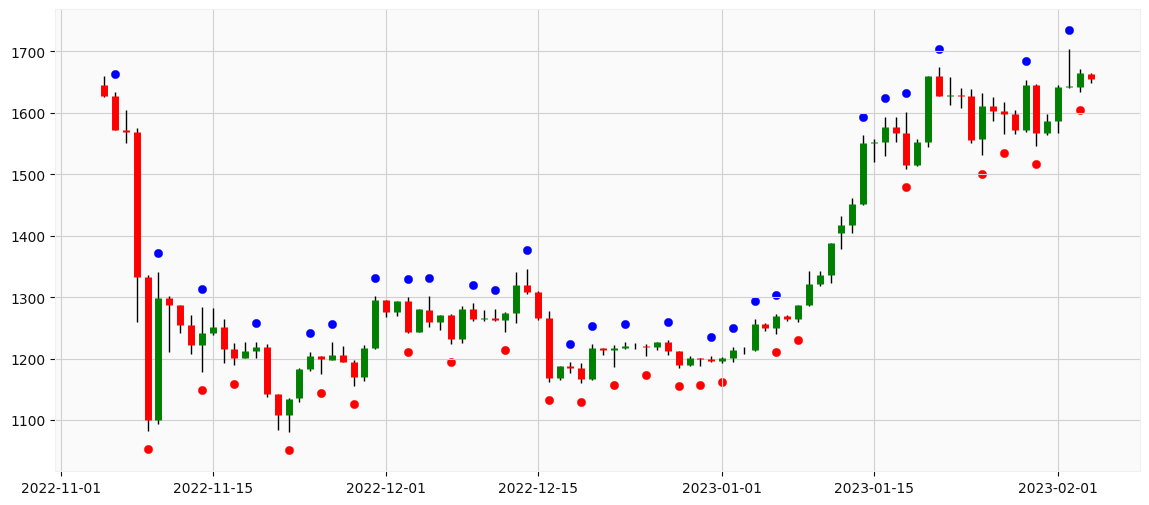